<h1 align= "center" > Heart Attack Analysis and Prediction </h1>

## Introduction <a id=2></a>

In [258]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

In [259]:
df = pd.read_csv("heart.csv")

In [260]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


Age : Age of the patient

Sex : Sex of the patient

exang: exercise induced angina (1 = yes; 0 = no)

ca: number of major vessels (0-3)

cp : Chest Pain type chest pain type

Value 1: typical angina
Value 2: atypical angina
Value 3: non-anginal pain
Value 4: asymptomatic

trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results

Value 0: normal
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
thalach : maximum heart rate achieved

target : 0= less chance of heart attack 1= more chance of heart attack

In [261]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [262]:
new_column = ["age", "sex", "cp", "trtbps", "chol", "fbs", "rest_ecg", "thalach", "exang", "oldpeak","slope", "ca", "thal", "target"]

In [263]:
df.columns = new_column

In [264]:
df.head()

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [265]:
print("Shape of Dataset: ",df.shape)

Shape of Dataset:  (303, 14)


In [266]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   rest_ecg  303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [267]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
rest_ecg    0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [268]:
isnull_number = []
for i in df.columns:
    x = df[i].isnull().sum()
    isnull_number.append(x)

pd.DataFrame(isnull_number, index = df.columns, columns = ["Total Missing Values"])

,Total Missing Values
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
rest_ecg,0
thalach,0
exang,0
oldpeak,0


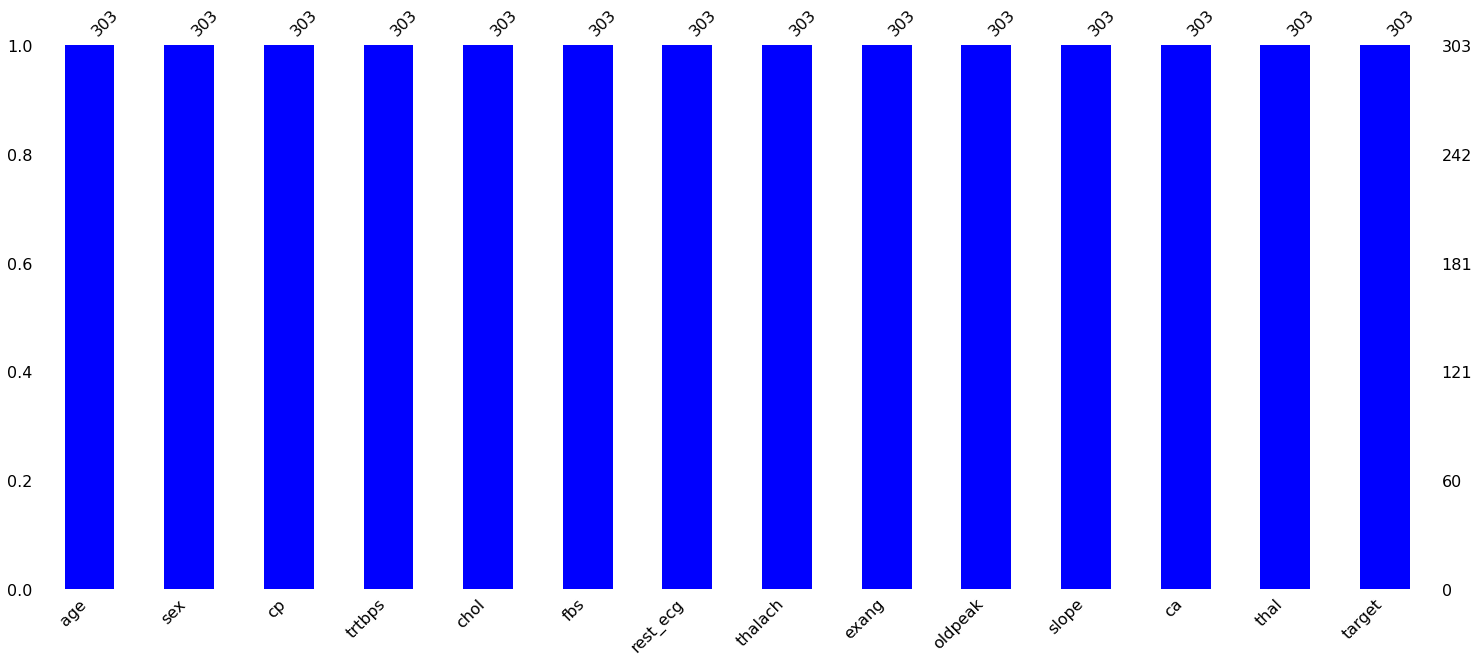

In [269]:
import missingno
missingno.bar(df, color="b");

In [270]:
unique_number = []
for i in df.columns:
    x = df[i].value_counts().count()
    unique_number.append(x)

pd.DataFrame(unique_number, index = df.columns, columns = ["Total Unique Values"])

,Total Unique Values
age,41
sex,2
cp,4
trtbps,49
chol,152
fbs,2
rest_ecg,3
thalach,91
exang,2
oldpeak,40


In [271]:
numeric_var = ["age", "trtbps", "chol", "thalach", "oldpeak"]
categoric_var = ["sex", "cp", "fbs", "rest_ecg", "exang", "slope", "ca","thal", "target"]

In [272]:
df[numeric_var].describe()

,age,trtbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


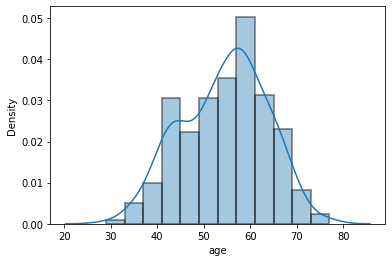

In [273]:
sns.distplot(df.age, hist_kws = dict(linewidth = 2, edgecolor="k"));

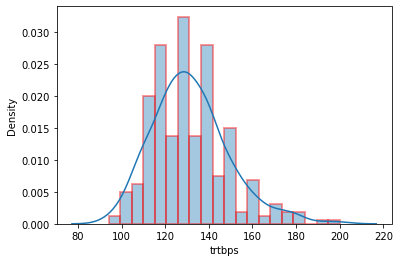

In [274]:
sns.distplot(df.trtbps, hist_kws = dict(linewidth = 2, edgecolor="r"), bins=20);

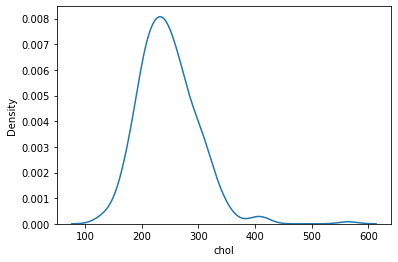

In [275]:
sns.distplot(df.chol, hist = False);

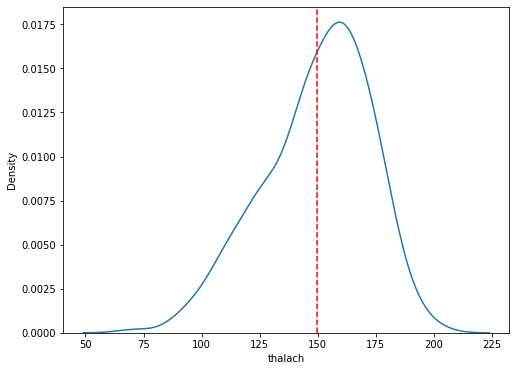

In [276]:
x, y = plt.subplots(figsize=(8,6)) 
sns.distplot(df.thalach, hist = False, ax=y)
y.axvline(df.thalach.mean(), color="r", ls="--");

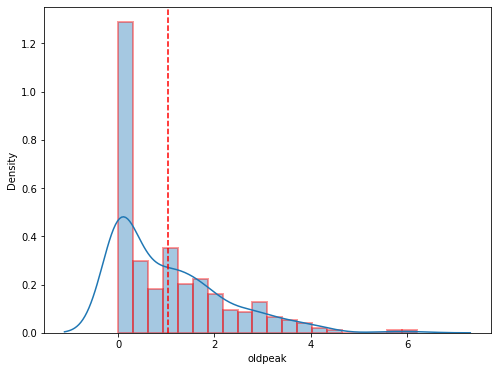

In [277]:
x, y = plt.subplots(figsize=(8,6)) 
sns.distplot(df.oldpeak, hist_kws = dict(linewidth = 2, edgecolor="r"), bins=20, ax=y)
y.axvline(df.oldpeak.mean(), color="r", ls="--");

In [278]:
numeric_axis_name = ["Age of the Patient", "Resting Blood Pressuse", "Cholestrol", "Maximum Heart Rate Achieved", "ST Depression"]

In [279]:
list(zip(numeric_var, numeric_axis_name))

[('age', 'Age of the Patient'),
 ('trtbps', 'Resting Blood Pressuse'),
 ('chol', 'Cholestrol'),
 ('thalach', 'Maximum Heart Rate Achieved'),
 ('oldpeak', 'ST Depression')]

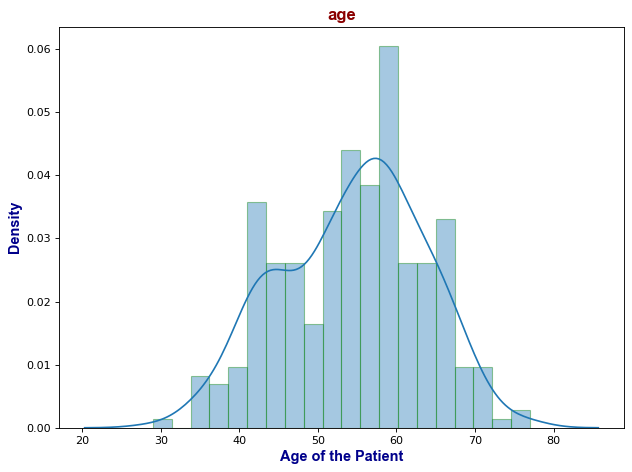

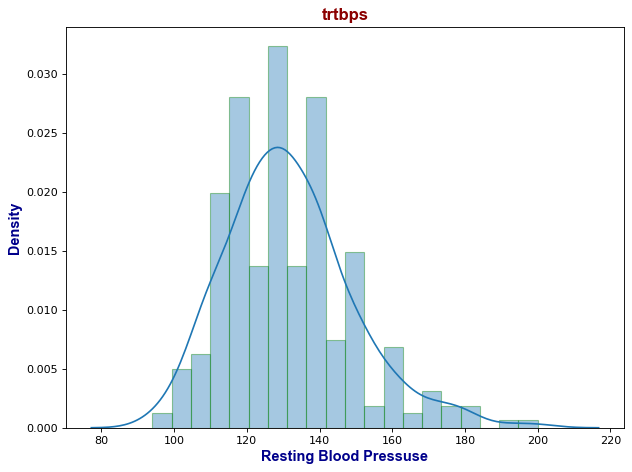

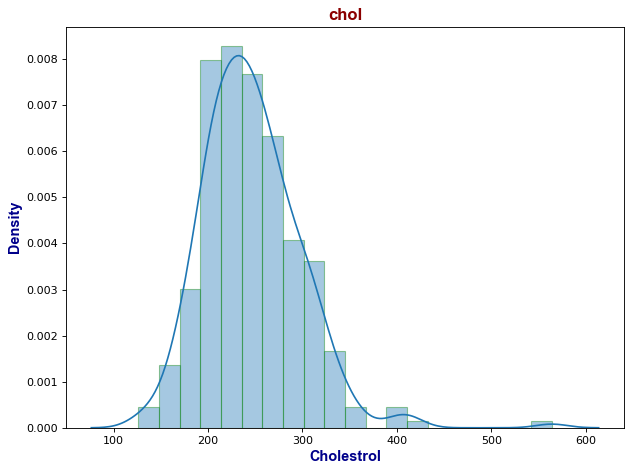

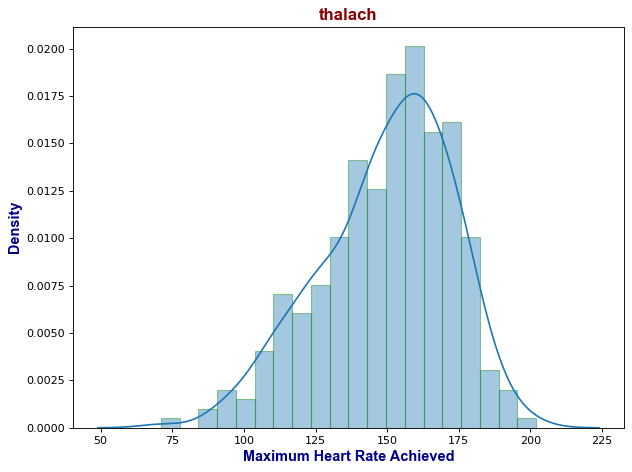

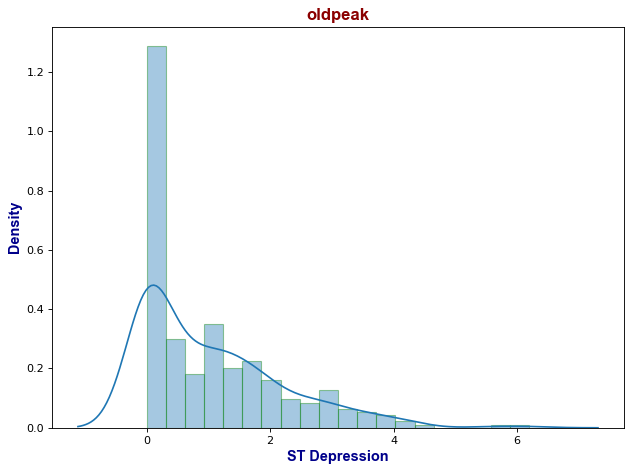

In [280]:
title_font = {"family" :"arial", "color" : "darkred", "weight" : "bold", "size" : 15 }
axis_font = {"family" :"arial", "color" : "darkblue", "weight" : "bold", "size" : 13 }

for i, z in list(zip(numeric_var, numeric_axis_name)):
    plt.figure(figsize=(8,6), dpi=80)
    sns.distplot(df[i], hist_kws = dict(linewidth = 1, edgecolor="g"), bins=20)
    plt.title(i,fontdict = title_font)
    plt.xlabel(z, fontdict = axis_font)
    plt.ylabel("Density", fontdict = axis_font)
    
    plt.tight_layout()
    plt.show()
    
    

In [281]:
categoric_var

['sex', 'cp', 'fbs', 'rest_ecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [282]:
categoric_axis_name = ["Gender", "Chest Pain Type", "Fasting Blood Sugar", "Resting Electrocardiographic Results",
                      "Exercise Induced Angina", "The Slope of ST Segment", "Number of Major Vessels",
                      "Thal", "Target"] 

In [283]:
list(zip(categoric_var, categoric_axis_name))

[('sex', 'Gender'),
 ('cp', 'Chest Pain Type'),
 ('fbs', 'Fasting Blood Sugar'),
 ('rest_ecg', 'Resting Electrocardiographic Results'),
 ('exang', 'Exercise Induced Angina'),
 ('slope', 'The Slope of ST Segment'),
 ('ca', 'Number of Major Vessels'),
 ('thal', 'Thal'),
 ('target', 'Target')]

In [284]:
df.cp.value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [285]:
list(df.cp.value_counts())

[143, 87, 50, 23]

In [286]:
list(df.cp.value_counts().index)

[0, 2, 1, 3]

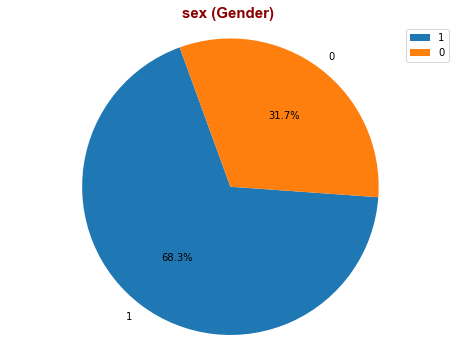

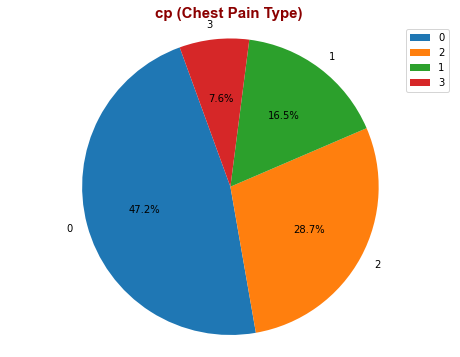

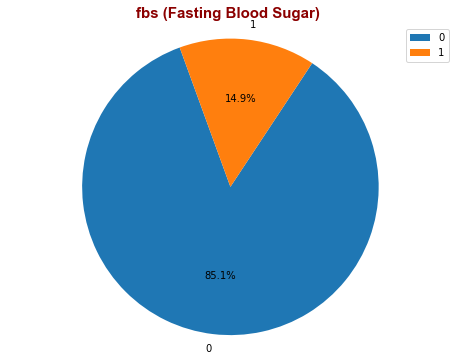

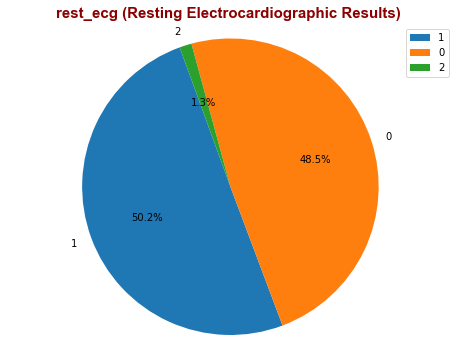

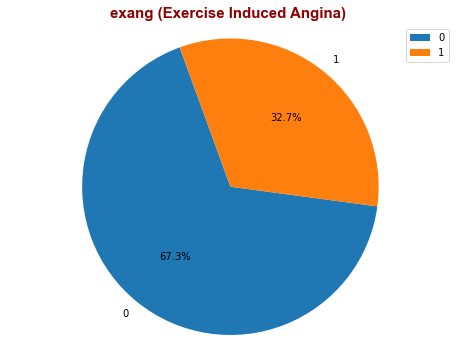

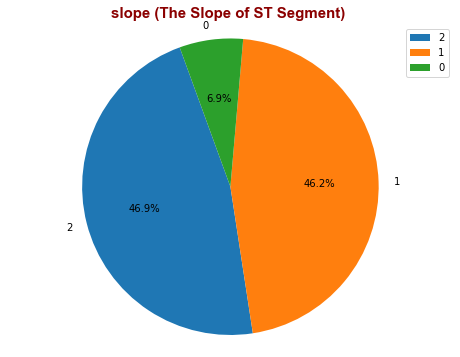

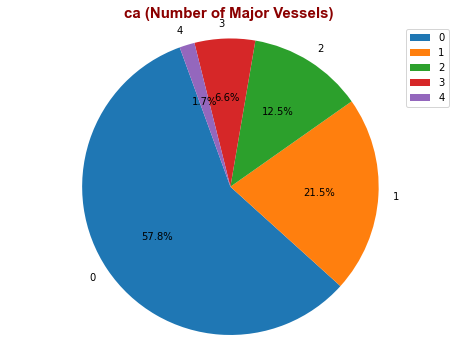

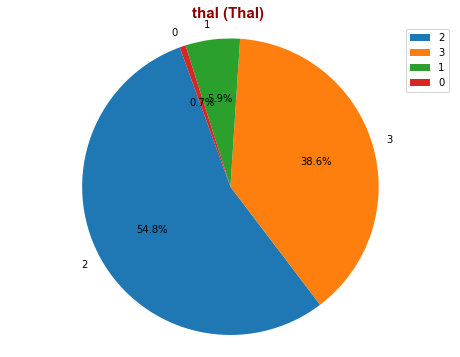

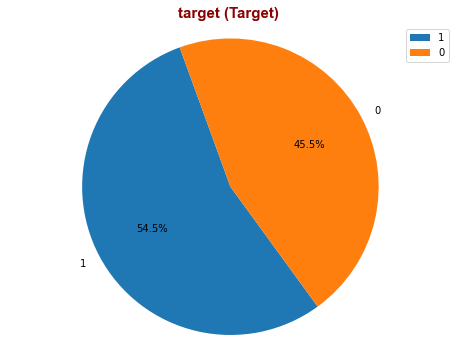

In [287]:
title_font = {"family" :"arial", "color" : "darkred", "weight" : "bold", "size" : 15 }
axis_font = {"family" :"arial", "color" : "darkblue", "weight" : "bold", "size" : 13 }

for i, z in list(zip(categoric_var, categoric_axis_name)):
    fig, ax = plt.subplots(figsize=(8,6))
    
    observation_values = list(df[i].value_counts().index)
    total_observation_values = list(df[i].value_counts())
    
    ax.pie(total_observation_values, labels = observation_values, autopct="%1.1f%%", startangle=110, labeldistance = 1.1)
    ax.axis("equal")
    
    plt.title(i + " (" + z + ") ",fontdict = title_font)
    plt.legend()
    
    
    plt.show()

In [288]:
df[df.thal==0]

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0


In [289]:
df.thal = df.thal.replace(0, np.nan)

In [290]:
df.loc[[48, 281], :]

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0,NaN,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,NaN,0


In [291]:
isnull_number = []
for i in df.columns:
    x = df[i].isnull().sum()
    isnull_number.append(x)

pd.DataFrame(isnull_number, index = df.columns, columns = ["Total Missing Values"])
   

,Total Missing Values
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
rest_ecg,0
thalach,0
exang,0
oldpeak,0


In [292]:
df.thal.fillna(2, inplace=True)

In [293]:
df.loc[[48, 281], :]

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0,2.0,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,2.0,0


In [294]:
df.thal = pd.to_numeric(df.thal, downcast = "integer")

In [295]:
df.loc[[48, 281], :]

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0,2,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,2,0


In [296]:
isnull_number = []
for i in df.columns:
    x = df[i].isnull().sum()
    isnull_number.append(x)

pd.DataFrame(isnull_number, index = df.columns, columns = ["Total Missing Values"])
   

,Total Missing Values
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
rest_ecg,0
thalach,0
exang,0
oldpeak,0


In [297]:
df.thal.value_counts()

2    168
3    117
1     18
Name: thal, dtype: int64

### 4.2 Bi-variate Analysis

4.2.1. Numerical Variables - Target Variable (Analysis with FaceGrid)

In [298]:
numeric_var

['age', 'trtbps', 'chol', 'thalach', 'oldpeak']

In [299]:
numeric_var.append("target")
numeric_var

['age', 'trtbps', 'chol', 'thalach', 'oldpeak', 'target']

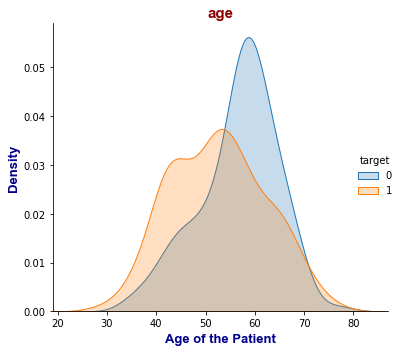

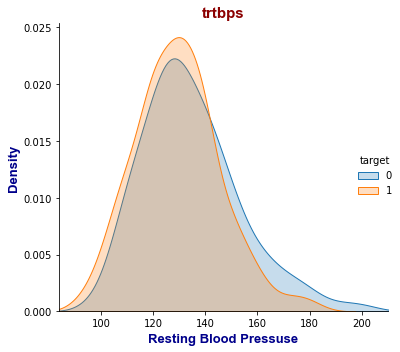

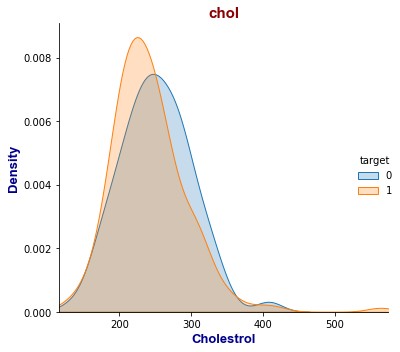

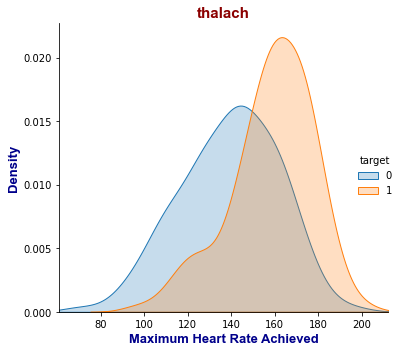

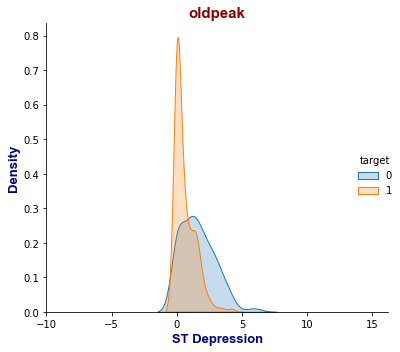

In [300]:
title_font = {"family" :"arial", "color" : "darkred", "weight" : "bold", "size" : 15 }
axis_font = {"family" :"arial", "color" : "darkblue", "weight" : "bold", "size" : 13 }

for i, z in list(zip(numeric_var, numeric_axis_name)):
    
    graph = sns.FacetGrid(df[numeric_var], hue="target", height=5, xlim=(df[i].min()-10, df[i].max()+10))
    graph.map(sns.kdeplot, i, shade=True)
    graph.add_legend()
    
    plt.title(i,fontdict = title_font)
    plt.xlabel(z, fontdict = axis_font)
    plt.ylabel("Density", fontdict = axis_font)
    
    plt.tight_layout()
    plt.show()
    

In [301]:
df[numeric_var].corr()

,age,trtbps,chol,thalach,oldpeak,target
age,1.000000,0.279351,0.213678,-0.398522,0.210013,-0.225439
trtbps,0.279351,1.000000,0.123174,-0.046698,0.193216,-0.144931
chol,0.213678,0.123174,1.000000,-0.009940,0.053952,-0.085239
thalach,-0.398522,-0.046698,-0.009940,1.000000,-0.344187,0.421741
oldpeak,0.210013,0.193216,0.053952,-0.344187,1.000000,-0.430696
target,-0.225439,-0.144931,-0.085239,0.421741,-0.430696,1.000000


In [302]:
df[numeric_var].corr().iloc[:,[-1]]

,target
age,-0.225439
trtbps,-0.144931
chol,-0.085239
thalach,0.421741
oldpeak,-0.430696
target,1.000000


#### Categorical Variables - Target Variable (Analysis with CountPlot)

In [303]:
df[categoric_var].corr()

,sex,cp,fbs,rest_ecg,exang,slope,ca,thal,target
sex,1.000000,-0.049353,0.045032,-0.058196,0.141664,-0.030711,0.118261,0.211652,-0.280937
cp,-0.049353,1.000000,0.094444,0.044421,-0.394280,0.119717,-0.181053,-0.169125,0.433798
fbs,0.045032,0.094444,1.000000,-0.084189,0.025665,-0.059894,0.137979,-0.011209,-0.028046
rest_ecg,-0.058196,0.044421,-0.084189,1.000000,-0.070733,0.093045,-0.072042,-0.013795,0.137230
exang,0.141664,-0.394280,0.025665,-0.070733,1.000000,-0.257748,0.115739,0.225508,-0.436757
slope,-0.030711,0.119717,-0.059894,0.093045,-0.257748,1.000000,-0.080155,-0.106310,0.345877
ca,0.118261,-0.181053,0.137979,-0.072042,0.115739,-0.080155,1.000000,0.143248,-0.391724
thal,0.211652,-0.169125,-0.011209,-0.013795,0.225508,-0.106310,0.143248,1.000000,-0.363322
target,-0.280937,0.433798,-0.028046,0.137230,-0.436757,0.345877,-0.391724,-0.363322,1.000000


In [304]:
df[categoric_var].corr().iloc[:, [-1]]

,target
sex,-0.280937
cp,0.433798
fbs,-0.028046
rest_ecg,0.137230
exang,-0.436757
slope,0.345877
ca,-0.391724
thal,-0.363322
target,1.000000


####  Examining Numeric Variables among themselves (Analysis with PairPlot)

In [305]:
numeric_var

['age', 'trtbps', 'chol', 'thalach', 'oldpeak', 'target']

In [306]:
numeric_var.remove("target")

In [307]:
numeric_var

['age', 'trtbps', 'chol', 'thalach', 'oldpeak']

In [308]:
df[numeric_var].head()

,age,trtbps,chol,thalach,oldpeak
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6


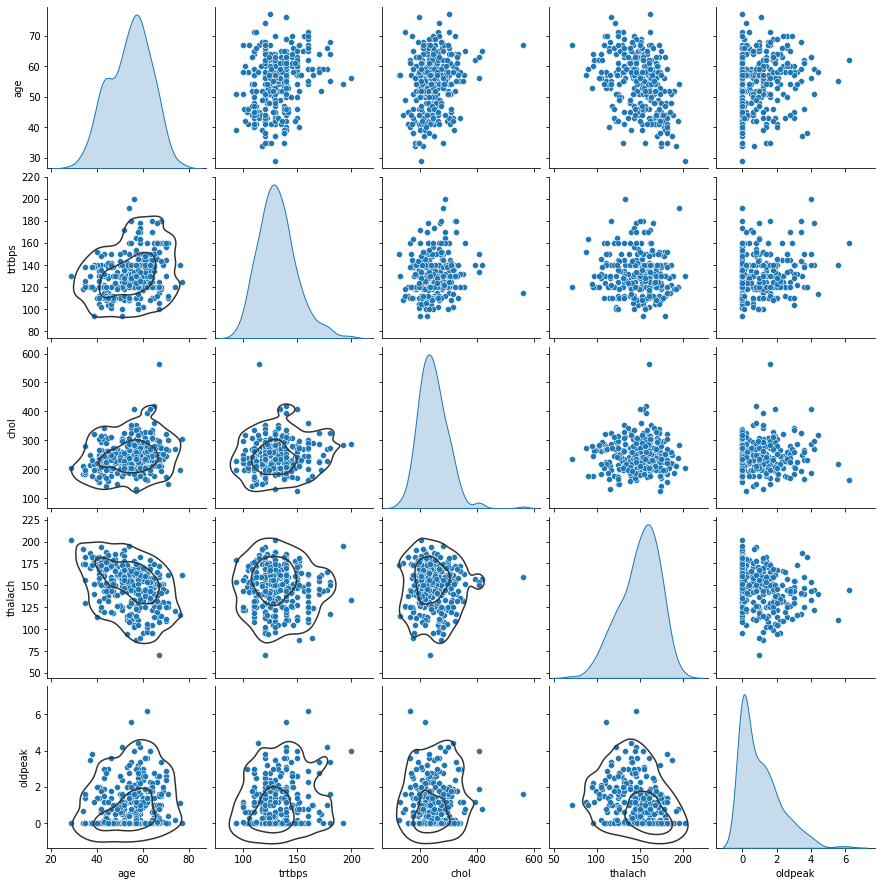

In [309]:
graph = sns.pairplot(df[numeric_var], diag_kind="kde")
graph.map_lower(sns.kdeplot, levels=3, color=".2")
plt.show()

#### Feature Scaling with the RobustScaler Method

In [310]:
from sklearn.preprocessing import RobustScaler

In [311]:
robust_scaler = RobustScaler()

In [312]:
scaled_data = robust_scaler.fit_transform(df[numeric_var])

In [313]:
scaled_data

array([[ 0.59259259,  0.75      , -0.11023622, -0.09230769,  0.9375    ],
       [-1.33333333,  0.        ,  0.15748031,  1.04615385,  1.6875    ],
       [-1.03703704,  0.        , -0.56692913,  0.58461538,  0.375     ],
       ...,
       [ 0.96296296,  0.7       , -0.74015748, -0.36923077,  1.625     ],
       [ 0.14814815,  0.        , -1.71653543, -1.16923077,  0.25      ],
       [ 0.14814815,  0.        , -0.06299213,  0.64615385, -0.5       ]])

In [314]:
type(scaled_data)

numpy.ndarray

In [315]:
df_scaled = pd.DataFrame(scaled_data, columns = numeric_var)
df_scaled.head()

,age,trtbps,chol,thalach,oldpeak
0,0.592593,0.75,-0.110236,-0.092308,0.9375
1,-1.333333,0.00,0.157480,1.046154,1.6875
2,-1.037037,0.00,-0.566929,0.584615,0.3750
3,0.074074,-0.50,-0.062992,0.769231,0.0000
4,0.148148,-0.50,1.795276,0.307692,-0.1250


####  Creating a New DataFrame with the Melt() Function

In [316]:
df_new = pd.concat([df_scaled, df.loc[:,"target"]], axis=1)

In [317]:
df_new.head()

,age,trtbps,chol,thalach,oldpeak,target
0,0.592593,0.75,-0.110236,-0.092308,0.9375,1
1,-1.333333,0.00,0.157480,1.046154,1.6875,1
2,-1.037037,0.00,-0.566929,0.584615,0.3750,1
3,0.074074,-0.50,-0.062992,0.769231,0.0000,1
4,0.148148,-0.50,1.795276,0.307692,-0.1250,1


In [318]:
melted_data = pd.melt(df_new, id_vars = "target", var_name="variables", value_name="value")

In [319]:
melted_data


,target,variables,value
0,1,age,0.592593
1,1,age,-1.333333
2,1,age,-1.037037
3,1,age,0.074074
4,1,age,0.148148
...,...,...,...
1510,0,oldpeak,-0.375000
1511,0,oldpeak,0.250000
1512,0,oldpeak,1.625000
1513,0,oldpeak,0.250000


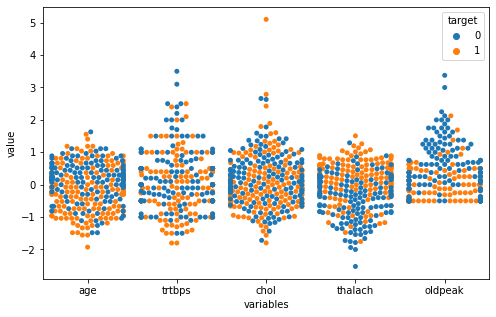

In [320]:
plt.figure(figsize=(8,5))
sns.swarmplot(x="variables", y="value", hue="target", data = melted_data)
axis_font = {"family" :"arial", "color" : "darkblue", "weight" : "bold", "size" : 13 }
plt.show()

####  Numerical Variables - Categorical Variables (Analysis with Swarm Plot)

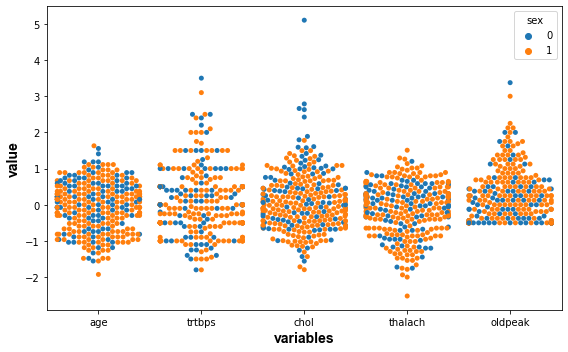

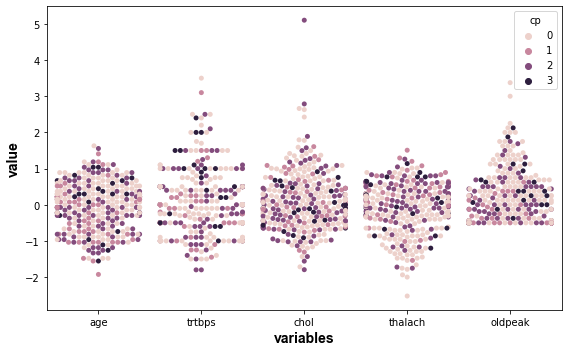

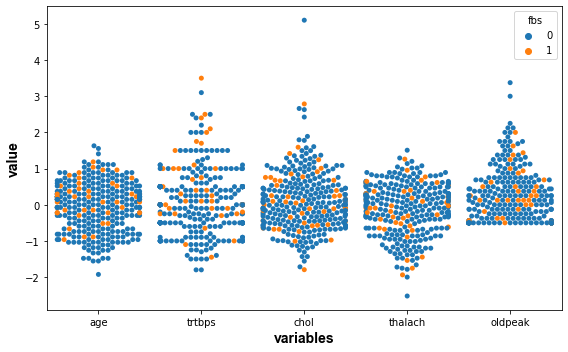

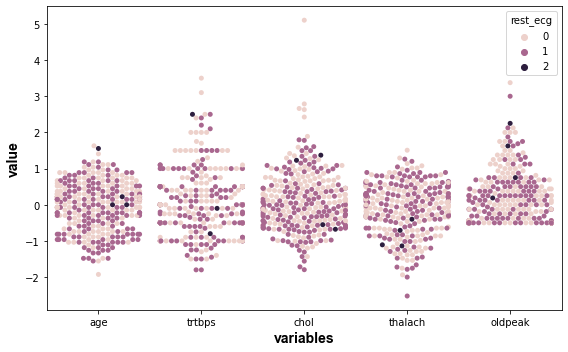

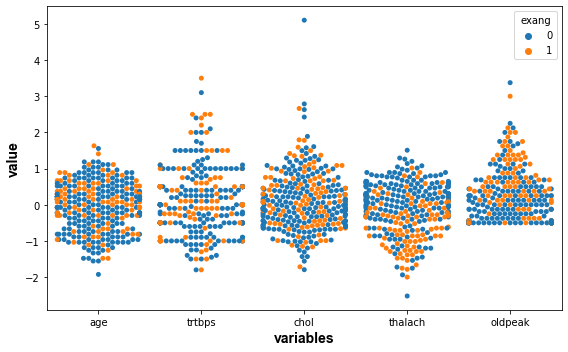

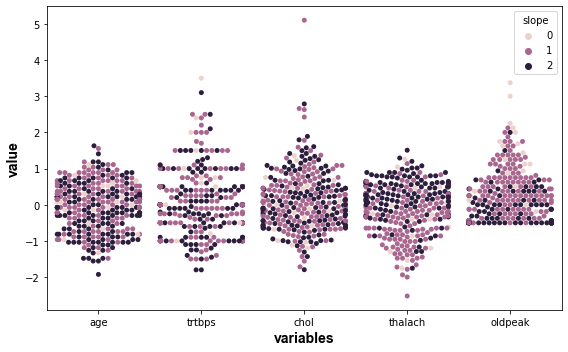

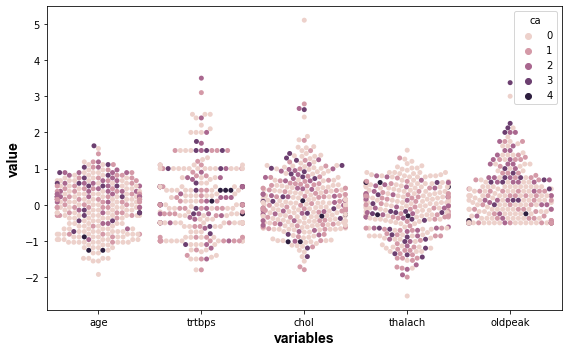

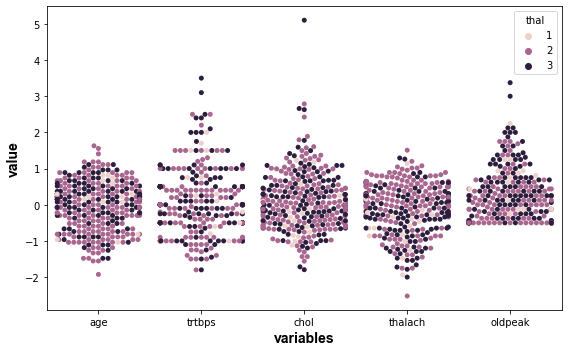

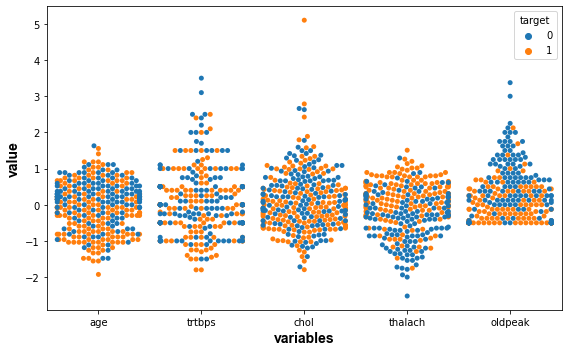

In [321]:
axis_font = {"family" :"arial", "color" : "black", "weight" : "bold", "size" : 14 }


for i in df[categoric_var]:
    df_new = pd.concat([df_scaled, df.loc[:,i]], axis=1)
    melted_data = pd.melt(df_new, id_vars = i, var_name="variables", value_name="value")
    plt.figure(figsize=(8,5))
    sns.swarmplot(x="variables", y="value", hue=i, data = melted_data)
    plt.xlabel("variables", fontdict = axis_font )
    plt.ylabel("value", fontdict = axis_font)
    plt.tight_layout()
    plt.show()

####  Numerical Variables - Categorical Variables(Analysis with Box Plot)

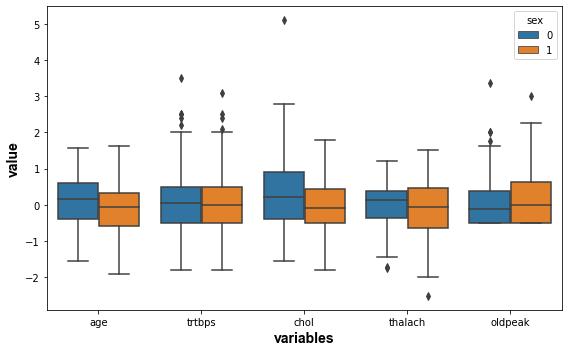

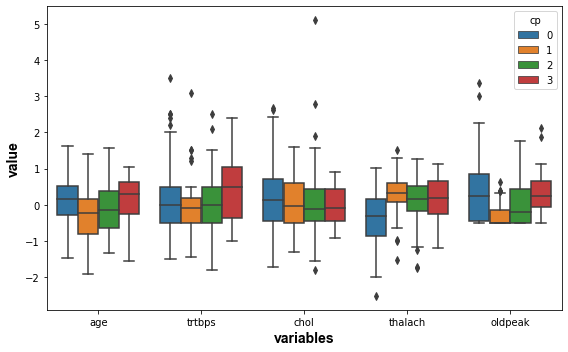

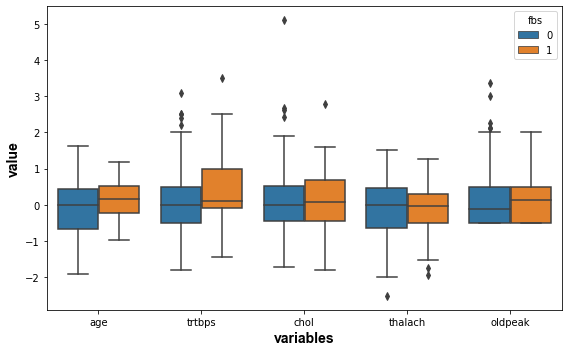

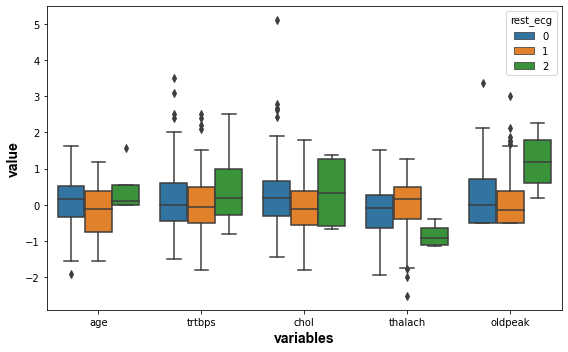

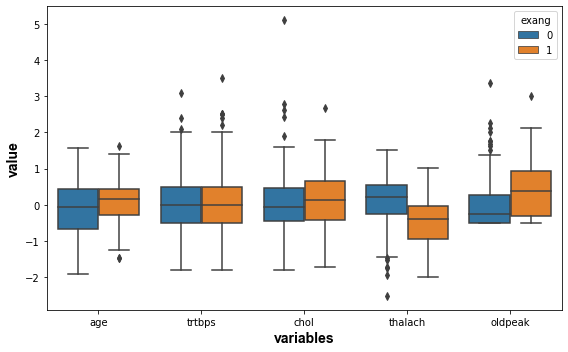

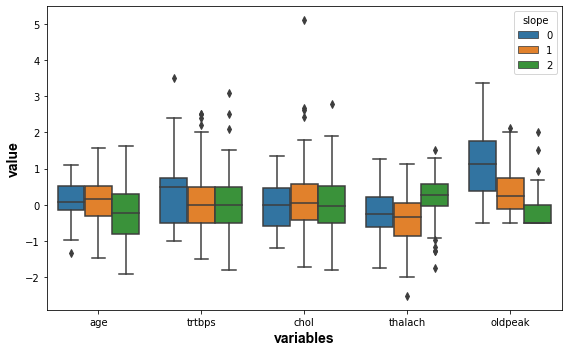

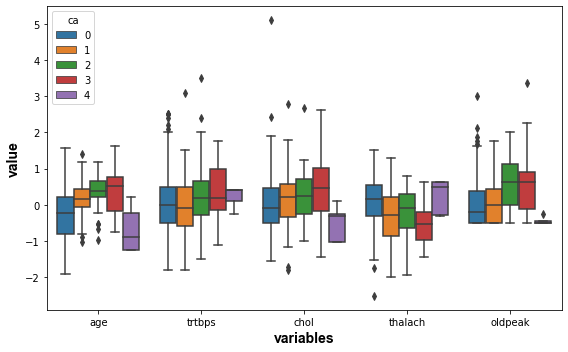

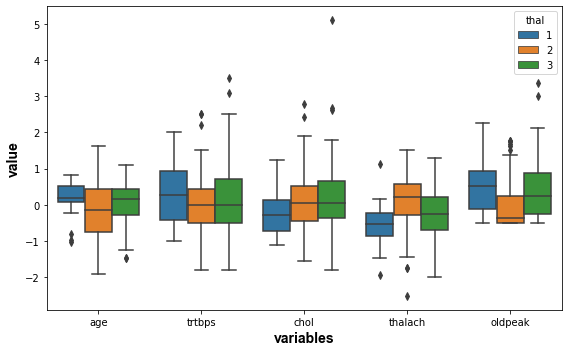

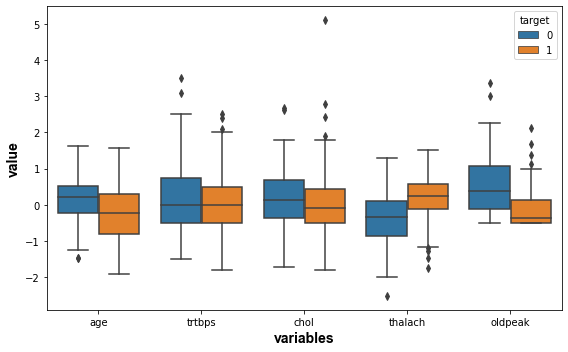

In [322]:
axis_font = {"family" :"arial", "color" : "black", "weight" : "bold", "size" : 14 }


for i in df[categoric_var]:
    df_new = pd.concat([df_scaled, df.loc[:,i]], axis=1)
    melted_data = pd.melt(df_new, id_vars = i, var_name="variables", value_name="value")
    plt.figure(figsize=(8,5))
    sns.boxplot(x="variables", y="value", hue=i, data = melted_data)
    plt.xlabel("variables", fontdict = axis_font )
    plt.ylabel("value", fontdict = axis_font)
    plt.tight_layout()
    plt.show()

####  Relationship between variables (Analysis with Heatmap)

In [323]:
df_scaled

,age,trtbps,chol,thalach,oldpeak
0,0.592593,0.75,-0.110236,-0.092308,0.9375
1,-1.333333,0.00,0.157480,1.046154,1.6875
2,-1.037037,0.00,-0.566929,0.584615,0.3750
3,0.074074,-0.50,-0.062992,0.769231,0.0000
4,0.148148,-0.50,1.795276,0.307692,-0.1250
...,...,...,...,...,...
298,0.148148,0.50,0.015748,-0.923077,-0.3750
299,-0.740741,-1.00,0.377953,-0.646154,0.2500
300,0.962963,0.70,-0.740157,-0.369231,1.6250
301,0.148148,0.00,-1.716535,-1.169231,0.2500


In [324]:
df_new2 = pd.concat([df_scaled, df[categoric_var]], axis=1)

In [325]:
df_new2

,age,trtbps,chol,thalach,oldpeak,sex,cp,fbs,rest_ecg,exang,slope,ca,thal,target
0,0.592593,0.75,-0.110236,-0.092308,0.9375,1,3,1,0,0,0,0,1,1
1,-1.333333,0.00,0.157480,1.046154,1.6875,1,2,0,1,0,0,0,2,1
2,-1.037037,0.00,-0.566929,0.584615,0.3750,0,1,0,0,0,2,0,2,1
3,0.074074,-0.50,-0.062992,0.769231,0.0000,1,1,0,1,0,2,0,2,1
4,0.148148,-0.50,1.795276,0.307692,-0.1250,0,0,0,1,1,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.148148,0.50,0.015748,-0.923077,-0.3750,0,0,0,1,1,1,0,3,0
299,-0.740741,-1.00,0.377953,-0.646154,0.2500,1,3,0,1,0,1,0,3,0
300,0.962963,0.70,-0.740157,-0.369231,1.6250,1,0,1,1,0,1,2,3,0
301,0.148148,0.00,-1.716535,-1.169231,0.2500,1,0,0,1,1,1,1,3,0


In [326]:
df_new2.corr()

,age,trtbps,chol,thalach,oldpeak,sex,cp,fbs,rest_ecg,exang,slope,ca,thal,target
age,1.000000,0.279351,0.213678,-0.398522,0.210013,-0.098447,-0.068653,0.121308,-0.116211,0.096801,-0.168814,0.276326,0.066745,-0.225439
trtbps,0.279351,1.000000,0.123174,-0.046698,0.193216,-0.056769,0.047608,0.177531,-0.114103,0.067616,-0.121475,0.101389,0.060638,-0.144931
chol,0.213678,0.123174,1.000000,-0.009940,0.053952,-0.197912,-0.076904,0.013294,-0.151040,0.067023,-0.004038,0.070511,0.087866,-0.085239
thalach,-0.398522,-0.046698,-0.009940,1.000000,-0.344187,-0.044020,0.295762,-0.008567,0.044123,-0.378812,0.386784,-0.213177,-0.115310,0.421741
oldpeak,0.210013,0.193216,0.053952,-0.344187,1.000000,0.096093,-0.149230,0.005747,-0.058770,0.288223,-0.577537,0.222682,0.210236,-0.430696
sex,-0.098447,-0.056769,-0.197912,-0.044020,0.096093,1.000000,-0.049353,0.045032,-0.058196,0.141664,-0.030711,0.118261,0.211652,-0.280937
cp,-0.068653,0.047608,-0.076904,0.295762,-0.149230,-0.049353,1.000000,0.094444,0.044421,-0.394280,0.119717,-0.181053,-0.169125,0.433798
fbs,0.121308,0.177531,0.013294,-0.008567,0.005747,0.045032,0.094444,1.000000,-0.084189,0.025665,-0.059894,0.137979,-0.011209,-0.028046
rest_ecg,-0.116211,-0.114103,-0.151040,0.044123,-0.058770,-0.058196,0.044421,-0.084189,1.000000,-0.070733,0.093045,-0.072042,-0.013795,0.137230
exang,0.096801,0.067616,0.067023,-0.378812,0.288223,0.141664,-0.394280,0.025665,-0.070733,1.000000,-0.257748,0.115739,0.225508,-0.436757


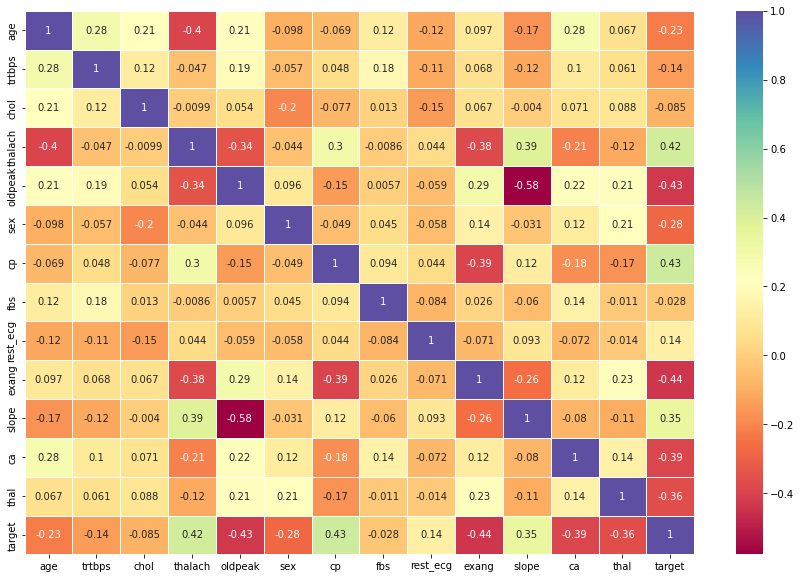

In [327]:
plt.figure(figsize=(15,10))
sns.heatmap(df_new2.corr(), cmap="Spectral", annot= True, linewidth=0.5);

### Preparation for Modelling

####  Dropping Columns with Low Correlation

In [328]:
df.head()

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [329]:
df.drop(["chol", "fbs", "rest_ecg"], axis = 1, inplace = True)

In [330]:
df.head()

,age,sex,cp,trtbps,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,150,0,2.3,0,0,1,1
1,37,1,2,130,187,0,3.5,0,0,2,1
2,41,0,1,130,172,0,1.4,2,0,2,1
3,56,1,1,120,178,0,0.8,2,0,2,1
4,57,0,0,120,163,1,0.6,2,0,2,1


####  Visualizing Outliers

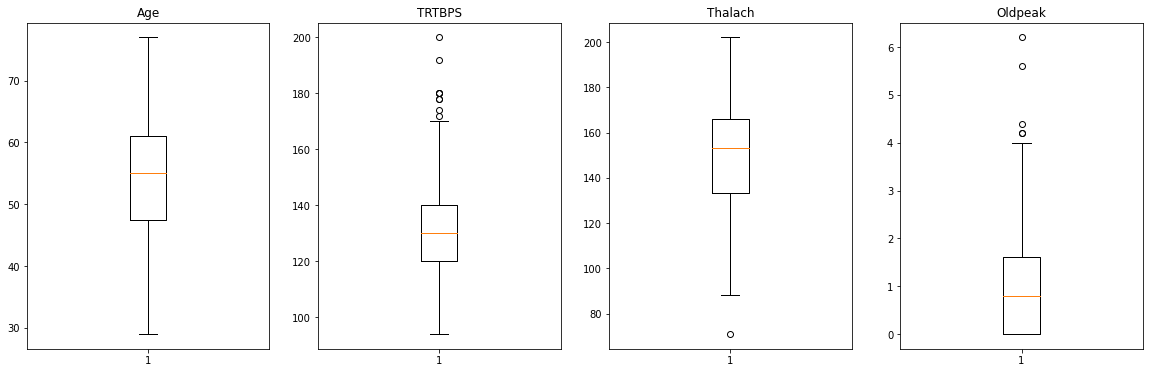

In [331]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20,6))
ax1.boxplot(df.age)
ax1.set_title("Age")

ax2.boxplot(df.trtbps)
ax2.set_title("TRTBPS")

ax3.boxplot(df.thalach)
ax3.set_title("Thalach")

ax4.boxplot(df.oldpeak)
ax4.set_title("Oldpeak")

plt.show();


####  Dealing with Outliers

####  Trtbps Variable

In [332]:
from scipy import stats
from scipy.stats import zscore
from scipy.stats.mstats import winsorize

In [333]:
z_scores_trtbps = zscore(df.trtbps)
for threshold in range(1,4):
    print("Threshold value {}".format(threshold))
    print("Number of Outliers {}".format(len(np.where(z_scores_trtbps>threshold)[0])))
    print("------------------")

Threshold value 1
Number of Outliers 51
------------------
Threshold value 2
Number of Outliers 13
------------------
Threshold value 3
Number of Outliers 2
------------------


In [334]:
df[z_scores_trtbps>2][["trtbps"]]

,trtbps
8,172
101,178
110,180
152,170
195,170
203,180
223,200
228,170
241,174
248,192


In [335]:
df[z_scores_trtbps>2]["trtbps"].min()

170

In [336]:
df[df.trtbps<170].trtbps.max()

165

In [337]:
winsorize_precentile_trtbps = (stats.percentileofscore(df.trtbps, 165)) / 100
print(winsorize_precentile_trtbps)

0.957095709570957


In [338]:
1- winsorize_precentile_trtbps

0.04290429042904298

In [339]:
trtbps_winsorize = winsorize(df.trtbps, (0,(1- winsorize_precentile_trtbps) ))

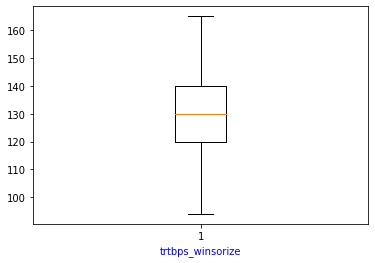

In [340]:
plt.boxplot(trtbps_winsorize)
plt.xlabel("trtbps_winsorize", color = "b")
plt.show()

In [341]:
df["trtbps_winsorize"] = trtbps_winsorize


In [342]:
df.head()

,age,sex,cp,trtbps,thalach,exang,oldpeak,slope,ca,thal,target,trtbps_winsorize
0,63,1,3,145,150,0,2.3,0,0,1,1,145
1,37,1,2,130,187,0,3.5,0,0,2,1,130
2,41,0,1,130,172,0,1.4,2,0,2,1,130
3,56,1,1,120,178,0,0.8,2,0,2,1,120
4,57,0,0,120,163,1,0.6,2,0,2,1,120


####  Appying One Hot Encoding Method to Categorical Variables

In [343]:
df_copy = df.copy()

In [344]:
df_copy.head()

,age,sex,cp,trtbps,thalach,exang,oldpeak,slope,ca,thal,target,trtbps_winsorize
0,63,1,3,145,150,0,2.3,0,0,1,1,145
1,37,1,2,130,187,0,3.5,0,0,2,1,130
2,41,0,1,130,172,0,1.4,2,0,2,1,130
3,56,1,1,120,178,0,0.8,2,0,2,1,120
4,57,0,0,120,163,1,0.6,2,0,2,1,120


In [345]:
categoric_var

['sex', 'cp', 'fbs', 'rest_ecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [346]:
categoric_var.remove("fbs")
categoric_var.remove("rest_ecg")

In [347]:
categoric_var

['sex', 'cp', 'exang', 'slope', 'ca', 'thal', 'target']

In [348]:
df_copy = pd.get_dummies(df_copy, columns=categoric_var[:-1],drop_first=True)

In [349]:
df_copy.head()

,age,trtbps,thalach,oldpeak,target,trtbps_winsorize,sex_1,cp_1,cp_2,cp_3,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_2,thal_3
0,63,145,150,2.3,1,145,1,0,0,1,0,0,0,0,0,0,0,0,0
1,37,130,187,3.5,1,130,1,0,1,0,0,0,0,0,0,0,0,1,0
2,41,130,172,1.4,1,130,0,1,0,0,0,0,1,0,0,0,0,1,0
3,56,120,178,0.8,1,120,1,1,0,0,0,0,1,0,0,0,0,1,0
4,57,120,163,0.6,1,120,0,0,0,0,1,0,1,0,0,0,0,1,0


####  Feature Scaling with the RobustScaler Method of ML Algorithms

In [350]:
new_numeric_var = ["age", "trtbps_winsorize"]

In [351]:
robus_scaler = RobustScaler()

In [352]:
df_copy[new_numeric_var] = robus_scaler.fit_transform(df_copy[new_numeric_var])

In [353]:
df_copy.head()

,age,trtbps,thalach,oldpeak,target,trtbps_winsorize,sex_1,cp_1,cp_2,cp_3,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_2,thal_3
0,0.592593,145,150,2.3,1,0.75,1,0,0,1,0,0,0,0,0,0,0,0,0
1,-1.333333,130,187,3.5,1,0.00,1,0,1,0,0,0,0,0,0,0,0,1,0
2,-1.037037,130,172,1.4,1,0.00,0,1,0,0,0,0,1,0,0,0,0,1,0
3,0.074074,120,178,0.8,1,-0.50,1,1,0,0,0,0,1,0,0,0,0,1,0
4,0.148148,120,163,0.6,1,-0.50,0,0,0,0,1,0,1,0,0,0,0,1,0


###  Seperating Data into Test anb Training Set

In [354]:
from sklearn.model_selection import train_test_split

In [355]:
X = df_copy.drop(["target"] , axis=1)
y = df[["target"]]

In [356]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=3)

In [357]:
X_train.head()

,age,trtbps,thalach,oldpeak,trtbps_winsorize,sex_1,cp_1,cp_2,cp_3,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_2,thal_3
187,-0.074074,124,109,2.2,-0.30,1,0,0,0,1,1,0,1,0,0,0,0,1
31,0.740741,120,140,0.4,-0.50,1,0,0,0,0,0,1,0,0,0,0,0,1
203,0.962963,180,150,1.6,1.75,1,0,1,0,1,1,0,0,0,0,0,0,1
70,-0.074074,120,147,0.4,-0.50,1,0,1,0,0,1,0,0,0,0,0,0,1
251,-0.888889,132,143,0.1,0.10,1,0,0,0,1,1,0,0,0,0,1,0,1


In [358]:
y_train.head()

,target
187,0
31,1
203,0
70,1
251,0


In [359]:
print(f"X_train: {X_train.shape[0]}")
print(f"X_test: {X_test.shape[0]}")
print(f"y_train: {y_train.shape[0]}")
print(f"y_test: {y_test.shape[0]}")

X_train: 272
X_test: 31
y_train: 272
y_test: 31


##  Modelling

###  Logistic Regression

In [360]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [361]:
log_reg = LogisticRegression()
log_reg

LogisticRegression()

In [362]:
log_reg.fit(X_train, y_train)

LogisticRegression()

In [363]:
y_pred = log_reg.predict(X_test)

In [364]:
y_pred

array([0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

In [365]:
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy: {}".format(accuracy))

Test Accuracy: 0.8709677419354839


### Cross validation

In [366]:
from sklearn.model_selection import cross_val_score

In [367]:
scores = cross_val_score(log_reg, X_test, y_test, cv=10)
print("Cross-Validation Accuracy Scores", scores.mean())

Cross-Validation Accuracy Scores 0.7416666666666667


#### ROC Curve and Area Under Curve (AUC)

In [368]:
from sklearn.metrics import plot_roc_curve

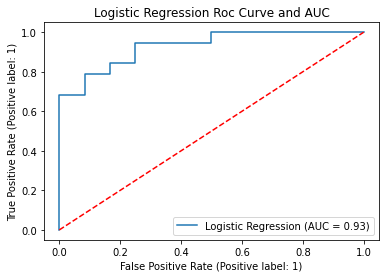

In [369]:
plot_roc_curve(log_reg, X_test, y_test, name="Logistic Regression")
plt.title("Logistic Regression Roc Curve and AUC")
plt.plot([0,1], [0,1], "r--")
plt.show()

### Decision Tree Algorithm

In [370]:
from sklearn.tree import DecisionTreeClassifier

In [371]:
dec_tree = DecisionTreeClassifier(random_state = 5)

In [372]:
dec_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=5)

In [373]:
y_pred = dec_tree.predict(X_test)

In [374]:
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy of Decision Tree is: {}".format(accuracy))

Test Accuracy of Decision Tree is: 0.8387096774193549


In [375]:
scores = cross_val_score(dec_tree, X_test, y_test, cv=10)
print("Cross-Validation Accuracy Scores", scores.mean())

Cross-Validation Accuracy Scores 0.7083333333333333


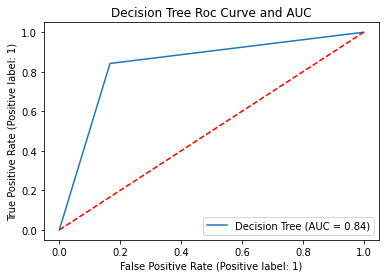

In [376]:
plot_roc_curve(dec_tree, X_test, y_test, name="Decision Tree")
plt.title("Decision Tree Roc Curve and AUC")
plt.plot([0,1], [0,1], "r--")
plt.show()

### Support Vector Machine Algorithm

In [377]:
from sklearn.svm import SVC

In [378]:
svc_model = SVC(random_state = 5)

In [379]:
svc_model.fit(X_train, y_train)

SVC(random_state=5)

In [380]:
y_pred = svc_model.predict(X_test)

In [381]:
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy of SVM is: {}".format(accuracy))

Test Accuracy of SVM is: 0.7419354838709677


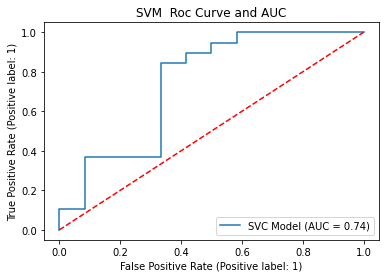

In [382]:
plot_roc_curve(svc_model, X_test, y_test, name="SVC Model")
plt.title("SVM  Roc Curve and AUC")
plt.plot([0,1], [0,1], "r--")
plt.show()

In [383]:
scores = cross_val_score(svc_model, X_test, y_test, cv=10)
print("Cross-Validation Accuracy Scores", scores.mean())

Cross-Validation Accuracy Scores 0.6166666666666667


### Random Forest Algorithm

In [384]:
from sklearn.ensemble import RandomForestClassifier

In [385]:
random_forest = RandomForestClassifier(random_state=5)

In [386]:
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=5)

In [387]:
y_pred = random_forest.predict(X_test)

In [388]:
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy of Random Forest is: {}".format(accuracy))

Test Accuracy of Random Forest is: 0.8387096774193549


In [389]:
scores = cross_val_score(random_forest, X_test, y_test, cv=10)
print("Cross-Validation Accuracy Scores", scores.mean())

Cross-Validation Accuracy Scores 0.7416666666666667


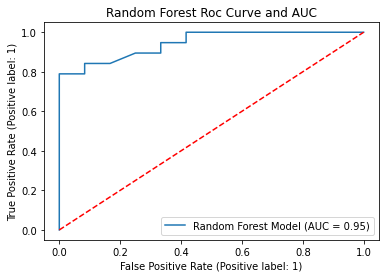

In [390]:
plot_roc_curve(random_forest, X_test, y_test, name="Random Forest Model")
plt.title("Random Forest Roc Curve and AUC")
plt.plot([0,1], [0,1], "r--")
plt.show()

###  Using Artficial Neural Network 

In [406]:
### Creating Sequential Model
from tensorflow import keras
model = keras.Sequential([
        keras.layers.Dense(18, input_dim=18, activation='relu'),
        keras.layers.Dense(180, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

In [407]:
### Compiling the model 
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [408]:
### Training our model
history=model.fit(X_train, y_train, epochs=50)

Epoch 1/50
9/9 [==============================] - 1s 11ms/step - loss: 4.3565 - accuracy: 0.4816
Epoch 2/50
9/9 [==============================] - 0s 12ms/step - loss: 1.6687 - accuracy: 0.5368
Epoch 3/50
9/9 [==============================] - 0s 11ms/step - loss: 0.9993 - accuracy: 0.5184
Epoch 4/50
9/9 [==============================] - 0s 10ms/step - loss: 0.6932 - accuracy: 0.6728
Epoch 5/50
9/9 [==============================] - 0s 11ms/step - loss: 0.6470 - accuracy: 0.6360
Epoch 6/50
9/9 [==============================] - 0s 10ms/step - loss: 0.6567 - accuracy: 0.6360
Epoch 7/50
9/9 [==============================] - 0s 9ms/step - loss: 0.6363 - accuracy: 0.6434
Epoch 8/50
9/9 [==============================] - 0s 10ms/step - loss: 0.6151 - accuracy: 0.6544
Epoch 9/50
9/9 [==============================] - 0s 10ms/step - loss: 0.6137 - accuracy: 0.6397
Epoch 10/50
9/9 [==============================] - 0s 10ms/step - loss: 0.6205 - accuracy: 0.6728
Epoch 11/50
9/9 [=============

In [409]:
### Prediction on x test
y_preds = model.predict(X_test)

In [410]:
### Evalating our model
print(model.evaluate(X_test, y_test))

1/1 [==============================] - 0s 186ms/step - loss: 0.4546 - accuracy: 0.8387
[0.4545878767967224, 0.8387096524238586]


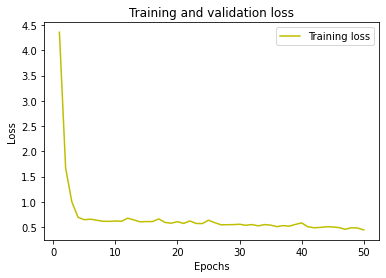

In [411]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
#valloss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
#plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [419]:
y_preds = []
for i in y_preds:
    if i>0.5:
        y_preds.append(1)
    else:
        y_preds.append(0)

In [421]:
y_preds

[]

In [416]:
from sklearn.metrics import classification_report
print("Classification Report: \n", classification_report(y_test, y_preds))

ValueError: Found input variables with inconsistent numbers of samples: [31, 0]